In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Amazon Sales data.csv')

In [3]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
# Convert Order Date and Ship Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

# Extract month and year from Order Date
data['Order Month']=data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order YearMonth'] = data['Order Date'].dt.to_period('M')

# Display the first few rows to verify the transformations
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Order YearMonth
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,2013-02


In [6]:
import matplotlib.pyplot as plt

# Calculate Monthly Sales Trend
monthly_sales_trend = data.groupby('Order Month').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

In [7]:
# Calculate Yearly Sales Trend
yearly_sales_trend = data.groupby('Order Year').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

In [8]:
# Calculate Yearly-Monthly Sales Trend
yearly_monthly_sales_trend = data.groupby('Order YearMonth').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()


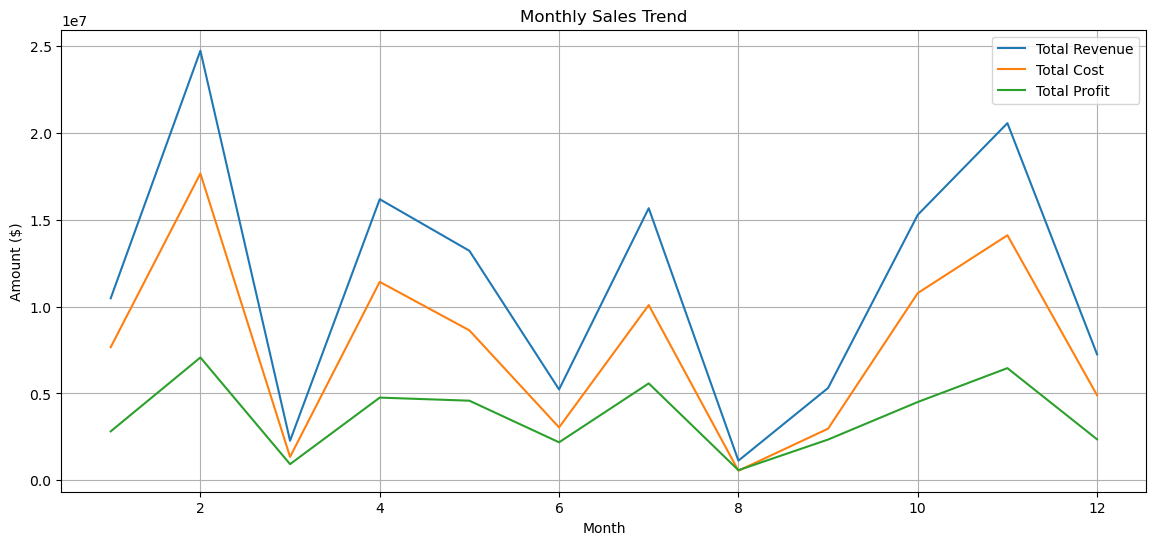

In [9]:
# Plot Monthly Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales_trend['Order Month'], monthly_sales_trend['Total Revenue'], label='Total Revenue')
plt.plot(monthly_sales_trend['Order Month'], monthly_sales_trend['Total Cost'], label='Total Cost')
plt.plot(monthly_sales_trend['Order Month'], monthly_sales_trend['Total Profit'], label='Total Profit')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

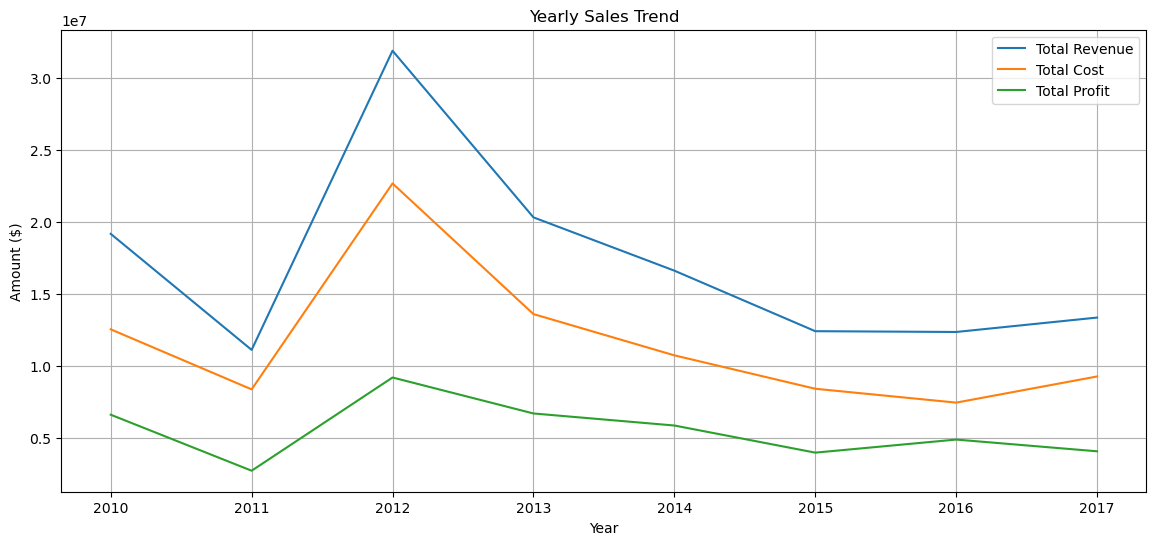

In [10]:
# Plot Yearly Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(yearly_sales_trend['Order Year'], yearly_sales_trend['Total Revenue'], label='Total Revenue')
plt.plot(yearly_sales_trend['Order Year'], yearly_sales_trend['Total Cost'], label='Total Cost')
plt.plot(yearly_sales_trend['Order Year'], yearly_sales_trend['Total Profit'], label='Total Profit')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

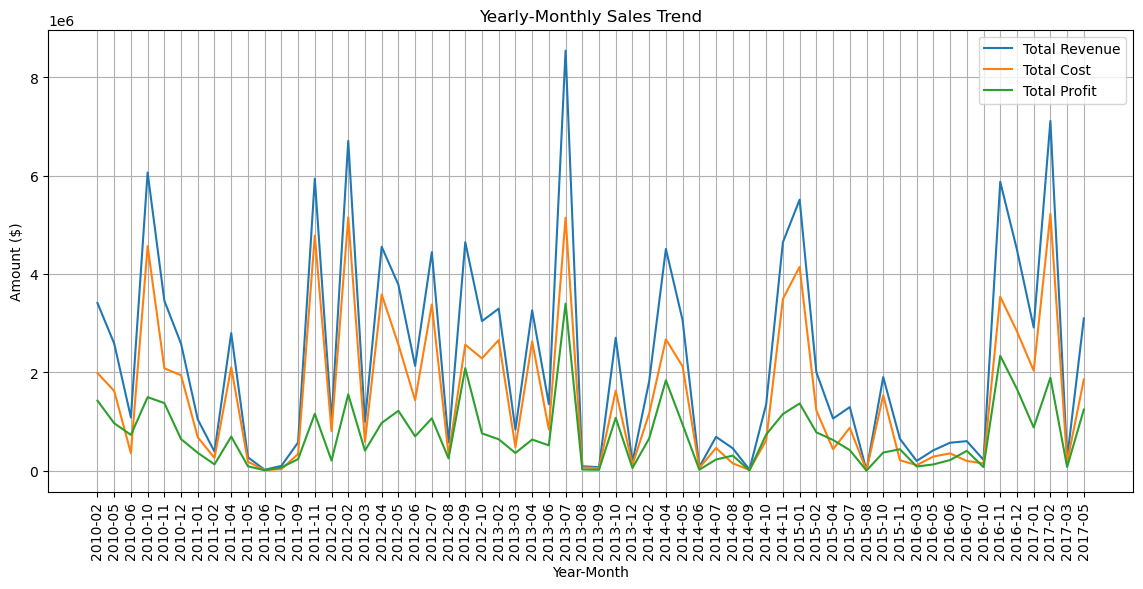

In [11]:
# Plot Yearly-Monthly Sales Trend
plt.figure(figsize=(14, 6))
plt.plot(yearly_monthly_sales_trend['Order YearMonth'].astype(str), yearly_monthly_sales_trend['Total Revenue'], label='Total Revenue')
plt.plot(yearly_monthly_sales_trend['Order YearMonth'].astype(str), yearly_monthly_sales_trend['Total Cost'], label='Total Cost')
plt.plot(yearly_monthly_sales_trend['Order YearMonth'].astype(str), yearly_monthly_sales_trend['Total Profit'], label='Total Profit')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Calculate key metrics
key_metrics = data.agg({
    'Units Sold': 'sum',
    'Unit Price': 'mean',
    'Unit Cost': 'mean',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index().rename(columns={0: 'Value'})

# Display key metrics
print(key_metrics)


           index         Value
0     Units Sold  5.128710e+05
1     Unit Price  2.767613e+02
2      Unit Cost  1.910480e+02
3  Total Revenue  1.373488e+08
4     Total Cost  9.318057e+07
5   Total Profit  4.416820e+07


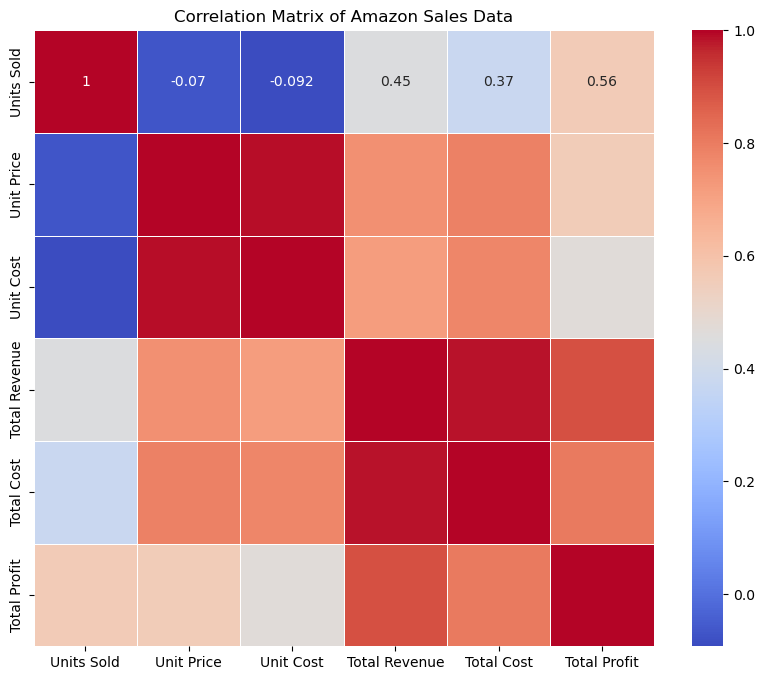

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Amazon Sales Data')
plt.show()


In [14]:
# Calculate descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)


                Order Date      Order ID            Ship Date   Units Sold  \
count                  100  1.000000e+02                  100   100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  2013-10-09 22:48:00  5128.710000   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   124.000000   
25%    2012-02-14 12:00:00  3.389225e+08  2012-02-24 18:00:00  2836.250000   
50%    2013-07-12 12:00:00  5.577086e+08  2013-08-11 12:00:00  5382.500000   
75%    2015-04-07 00:00:00  7.907551e+08  2015-04-28 00:00:00  7369.000000   
max    2017-05-22 00:00:00  9.940222e+08  2017-06-17 00:00:00  9925.000000   
std                    NaN  2.606153e+08                  NaN  2794.484562   

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit  \
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02   
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05   
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e

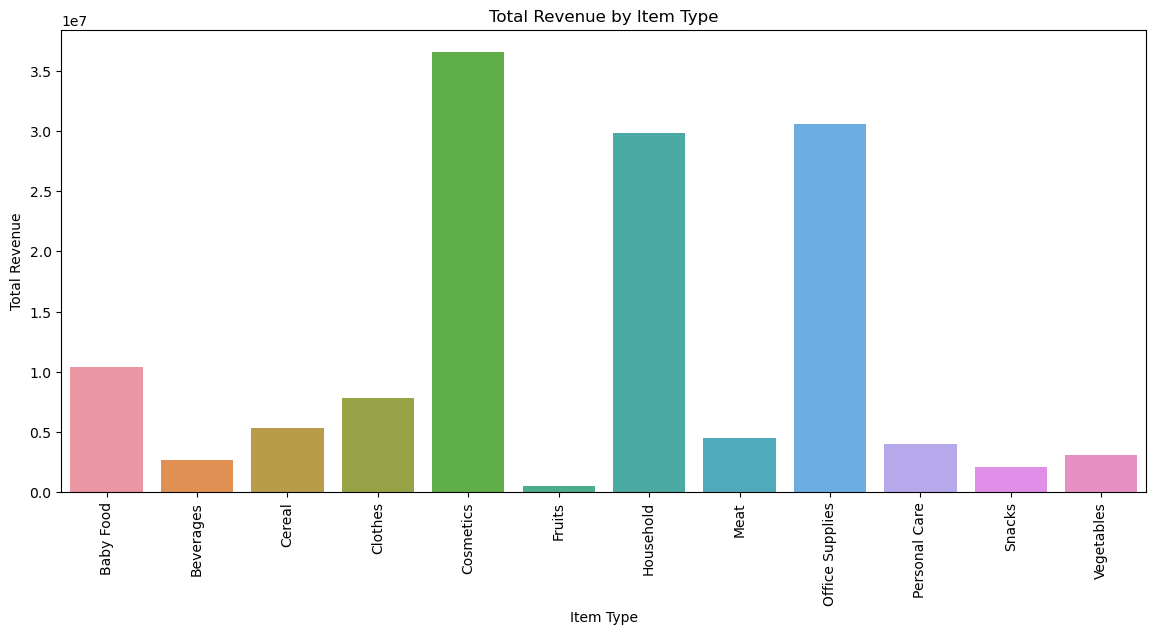

In [15]:
# Sales performance by Item Type
item_type_performance = data.groupby('Item Type').agg({
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Total Profit': 'sum'
}).reset_index()

# Plot sales performance by Item Type
plt.figure(figsize=(14, 6))
sns.barplot(x='Item Type', y='Total Revenue', data=item_type_performance)
plt.title('Total Revenue by Item Type')
plt.xticks(rotation=90)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


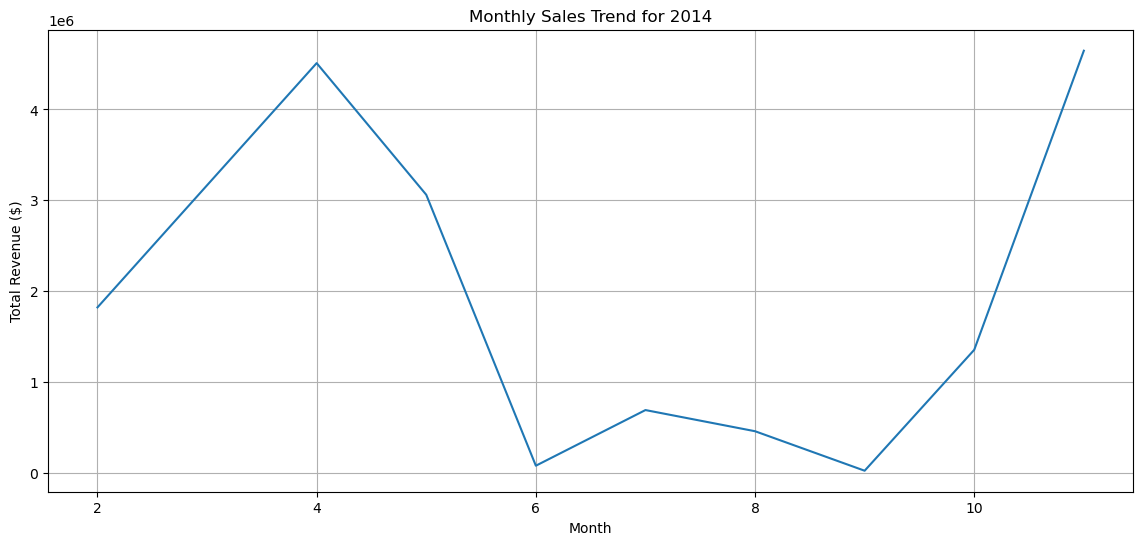

In [16]:
# Monthly sales trend for a specific year
monthly_sales_2014 = data[data['Order Year'] == 2014].groupby('Order Month').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Plot monthly sales trend for 2014
plt.figure(figsize=(14, 6))
sns.lineplot(x='Order Month', y='Total Revenue', data=monthly_sales_2014)
plt.title('Monthly Sales Trend for 2014')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data for predictive analysis
features = data[['Units Sold', 'Unit Price', 'Unit Cost']]
target = data['Total Revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the model's performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 322510611072.71747
R-squared: 0.8543165315212506


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


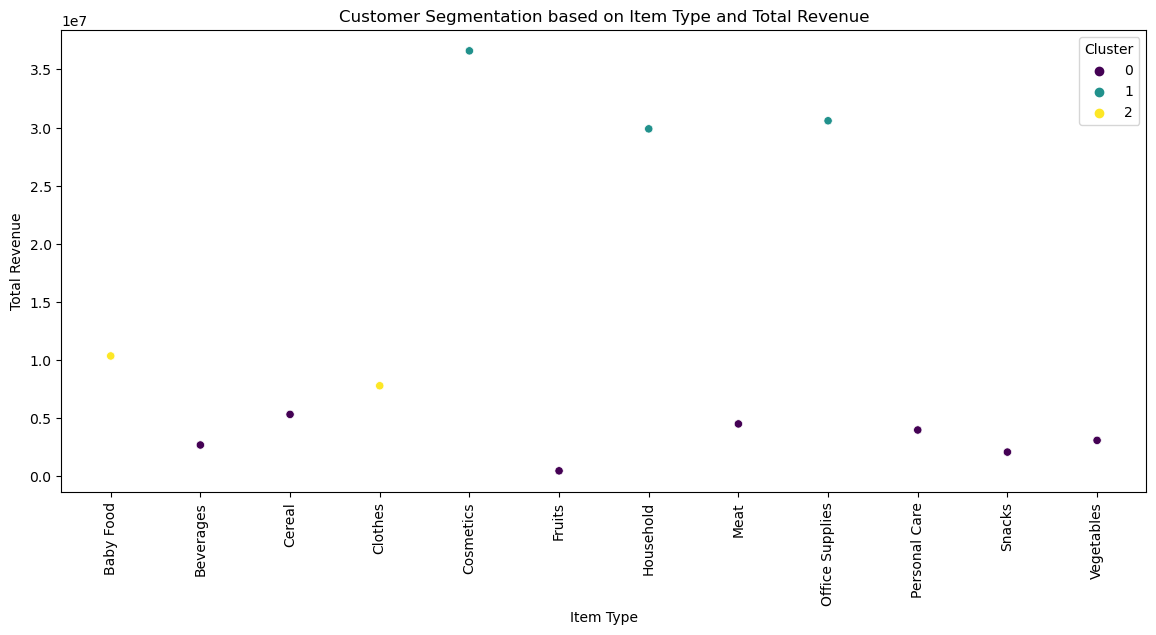

In [18]:
from sklearn.cluster import KMeans

# Assume we have customer-level data
# For demonstration, let's use item types and total revenue
data_for_clustering = data[['Item Type', 'Total Revenue']].groupby('Item Type').sum().reset_index()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['Total Revenue']])

# Plot clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Item Type', y='Total Revenue', hue='Cluster', data=data_for_clustering, palette='viridis')
plt.title('Customer Segmentation based on Item Type and Total Revenue')
plt.xticks(rotation=90)
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score





# Feature selection: Use relevant features for predicting 'Total Profit'
features = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost']]
target = data['Total Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the Total Profit on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Optional: Display actual vs predicted values for comparison
comparison = pd.DataFrame({'Actual Profit': y_test, 'Predicted Profit': y_pred})
print(comparison.head())


Mean Squared Error: 8641167069.725185
R-squared: 0.948311301205166
    Actual Profit  Predicted Profit
83      225246.90       345277.2939
53      436446.25       477288.8780
70      632512.50       822390.9477
45       85223.58        72254.1357
44      435499.20       409532.5532
